#**QUESTION 2**
**How many matches did each player win in the French Open Men's 2013 tennis tournament? Plot the graph also for the above question**

                    Player1 Wins  Player2 Wins  Total Wins
Rafael Nadal                 6.0           1.0         7.0
David Ferrer                 1.0           5.0         6.0
Jo-Wilfried Tsonga           5.0           0.0         5.0
Novak Djokovic               5.0           0.0         5.0
Tommy Robredo                1.0           3.0         4.0
...                          ...           ...         ...
Lukasz Kubot                 1.0           0.0         1.0
Somdev Devvarman             1.0           0.0         1.0
Martin Klizan                1.0           0.0         1.0
Fernando Verdasco            1.0           0.0         1.0
Pablo Cuevas                 0.0           1.0         1.0

[64 rows x 3 columns]


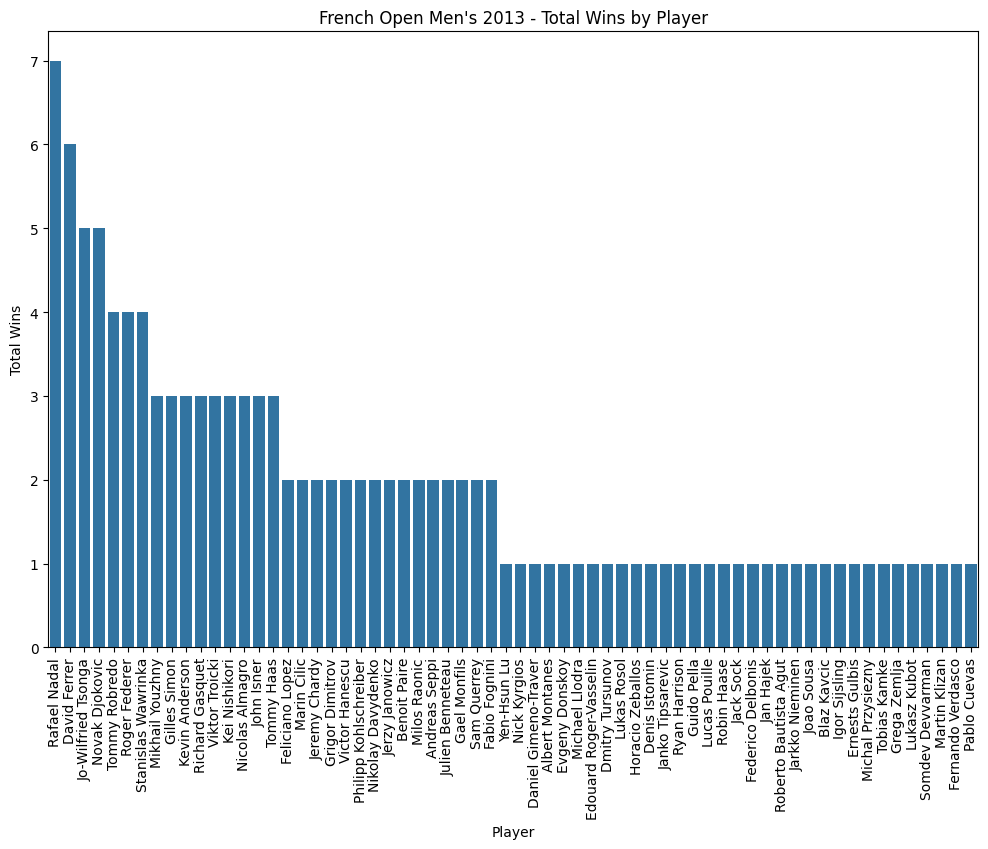

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('FrenchOpen-men-2013.csv')

player1_wins = df[df['Result'] == 1]['Player1'].value_counts()
player2_wins = df[df['Result'] == 0]['Player2'].value_counts()

player_wins = pd.concat([player1_wins, player2_wins], axis=1)
player_wins.columns = ['Player1 Wins', 'Player2 Wins']
player_wins.fillna(0, inplace=True)

player_wins['Total Wins'] = player_wins['Player1 Wins'] + player_wins['Player2 Wins']

player_wins = player_wins.sort_values(by='Total Wins', ascending=False)

print(player_wins)

plt.figure(figsize=(12, 8))
sns.barplot(x=player_wins.index, y=player_wins['Total Wins'])
plt.xticks(rotation=90)
plt.xlabel('Player')
plt.ylabel('Total Wins')
plt.title('French Open Men\'s 2013 - Total Wins by Player')
plt.show()

#**Question 1**
**What is the average first serve percentage (FSP) of Player 1 and Player 2 in the Australia Open Men's 2013 tennis tournament?**
**Show it in the bar graph**



Average FSP for Player 1: 61.33%
Average FSP for Player 2: 61.44%


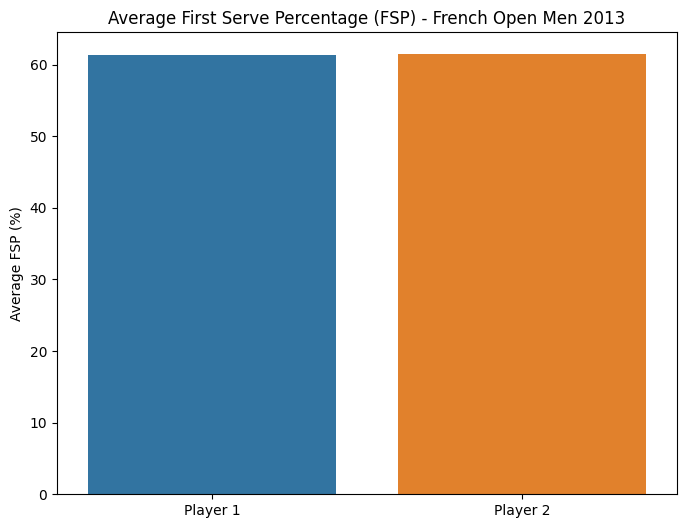

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data = pd.read_csv('AusOpen-men-2013.csv')

avg_fsp_player1 = data['FSP.1'].mean()
avg_fsp_player2 = data['FSP.2'].mean()

print(f'Average FSP for Player 1: {avg_fsp_player1:.2f}%')
print(f'Average FSP for Player 2: {avg_fsp_player2:.2f}%')

plt.figure(figsize=(8, 6))
sns.barplot(x=['Player 1', 'Player 2'], y=[avg_fsp_player1, avg_fsp_player2])
plt.title('Average First Serve Percentage (FSP) - French Open Men 2013')
plt.ylabel('Average FSP (%)')
plt.show()


#**QUESTION 3**
**What is the distribution of first serve percentage (FSP) for Player 1 (Serena Williams) and Player 2 (Ashleigh Barty) in the 2013 Australian Open Women's tournament?**
**Plot the values in the graph format**


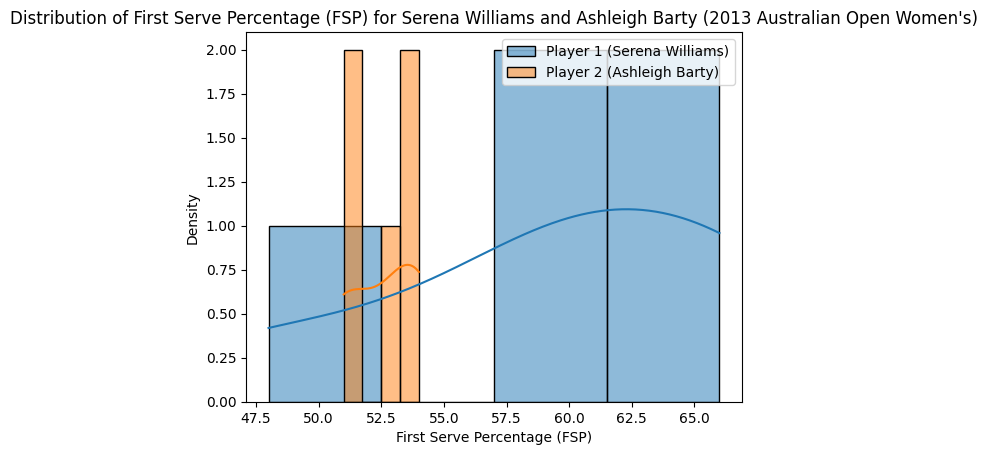

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('AusOpen-women-2013.csv')

player1 = df[df['Player1'] == 'Serena Williams']
player2 = df[df['Player2'] == 'Ashleigh Barty']

player1_and_2 = pd.concat([player1, player2])

sns.histplot(player1_and_2['FSP.1'], kde=True, label='Player 1 (Serena Williams)')
sns.histplot(player1_and_2['FSP.2'], kde=True, label='Player 2 (Ashleigh Barty)')
plt.xlabel('First Serve Percentage (FSP)')
plt.ylabel('Density')
plt.title('Distribution of First Serve Percentage (FSP) for Serena Williams and Ashleigh Barty (2013 Australian Open Women\'s)')
plt.legend()
plt.show()


#**QUESTION 4**
**What is the distribution of players' results in the French Open Women's 2013 tennis tournament?**


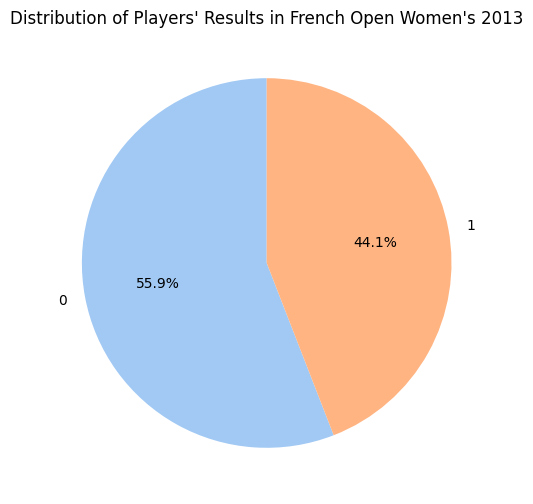

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data = pd.read_csv('FrenchOpen-women-2013.csv')
result_counts = data['Result'].value_counts()
labels = result_counts.index
sizes = result_counts.values
colors = sns.color_palette('pastel')[0: len(labels)]

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Players\' Results in French Open Women\'s 2013')
plt.show()

#**QUESTION 5**
**What is the distribution of match results (Win/Loss) in the US Open Men's Tennis Championship 2013?**


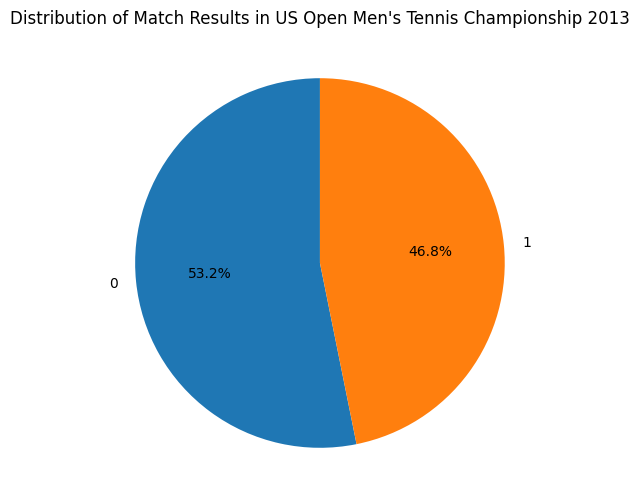

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('USOpen-men-2013.csv')
result_counts = df['Result'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Match Results in US Open Men\'s Tennis Championship 2013')
plt.show()

#**QUESTION 6**
**Can you cluster the players based on their performance in the US Open Women's 2013 tennis matches using the provided dataset, and visualize the clusters using scatter plots for the following attributes: FSP.1, ACE.1, WNR.1, UFE.1, BPW.1, FSP.2, ACE.2, WNR.2, UFE.2, and BPW.2?**


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


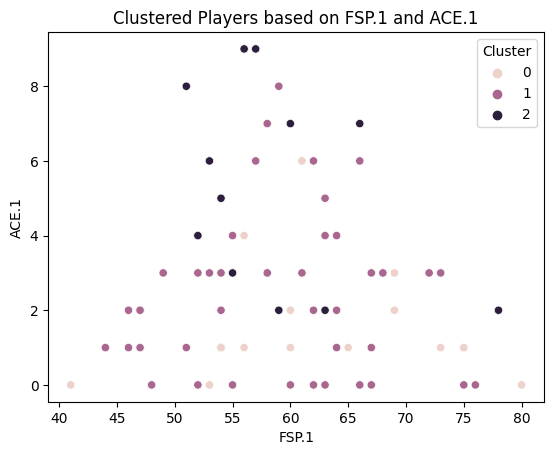

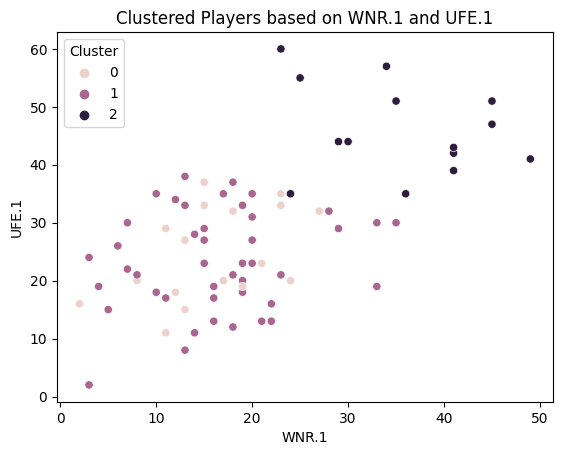

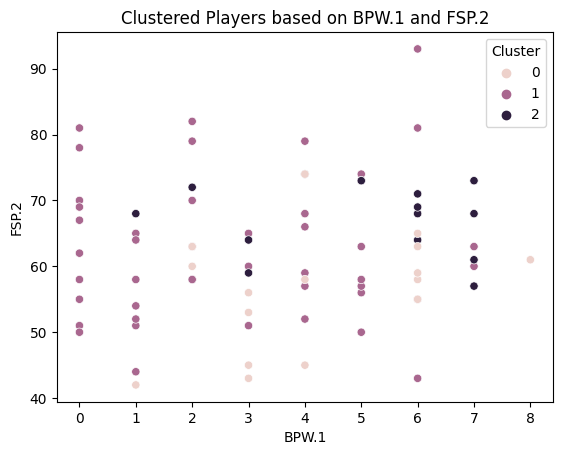

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np

df = pd.read_csv('USOpen-women-2013.csv')

columns = ['FSP.1', 'ACE.1', 'WNR.1', 'UFE.1', 'BPW.1', 'FSP.2', 'ACE.2', 'WNR.2', 'UFE.2', 'BPW.2']
data = df[columns]

kmeans = KMeans(n_clusters=3)
kmeans.fit(data)
df['Cluster'] = kmeans.labels_

sns.scatterplot(x='FSP.1', y='ACE.1', hue='Cluster', data=df)
plt.title('Clustered Players based on FSP.1 and ACE.1')
plt.xlabel('FSP.1')
plt.ylabel('ACE.1')
plt.show()

sns.scatterplot(x='WNR.1', y='UFE.1', hue='Cluster', data=df)
plt.title('Clustered Players based on WNR.1 and UFE.1')
plt.xlabel('WNR.1')
plt.ylabel('UFE.1')
plt.show()

sns.scatterplot(x='BPW.1', y='FSP.2', hue='Cluster', data=df)
plt.title('Clustered Players based on BPW.1 and FSP.2')
plt.xlabel('BPW.1')
plt.ylabel('FSP.2')
plt.show()

#**QUESTION 7**
**Can you analyze the dataset 'Wimbledon-men-2013.csv' and provide insights on the performance of tennis players in the Wimbledon 2013 tournament using various data analysis techniques such as data visualization, statistical analysis, and machine learning?**


Dataset shape:  (114, 42)
Columns in the dataset:  Index(['Player1', 'Player2', 'Round', 'Result', 'FNL.1', 'FNL.2', 'FSP.1',
       'FSW.1', 'SSP.1', 'SSW.1', 'ACE.1', 'DBF.1', 'WNR.1', 'UFE.1', 'BPC.1',
       'BPW.1', 'NPA.1', 'NPW.1', 'TPW.1', 'ST1.1', 'ST2.1', 'ST3.1', 'ST4.1',
       'ST5.1', 'FSP.2', 'FSW.2', 'SSP.2', 'SSW.2', 'ACE.2', 'DBF.2', 'WNR.2',
       'UFE.2', 'BPC.2', 'BPW.2', 'NPA.2', 'NPW.2', 'TPW.2', 'ST1.2', 'ST2.2',
       'ST3.2', 'ST4.2', 'ST5.2'],
      dtype='object')
Data types of columns:  Player1     object
Player2     object
Round        int64
Result       int64
FNL.1        int64
FNL.2        int64
FSP.1        int64
FSW.1        int64
SSP.1        int64
SSW.1        int64
ACE.1        int64
DBF.1      float64
WNR.1        int64
UFE.1        int64
BPC.1        int64
BPW.1        int64
NPA.1        int64
NPW.1        int64
TPW.1      float64
ST1.1        int64
ST2.1        int64
ST3.1        int64
ST4.1      float64
ST5.1      float64
FSP.2        int64
FS

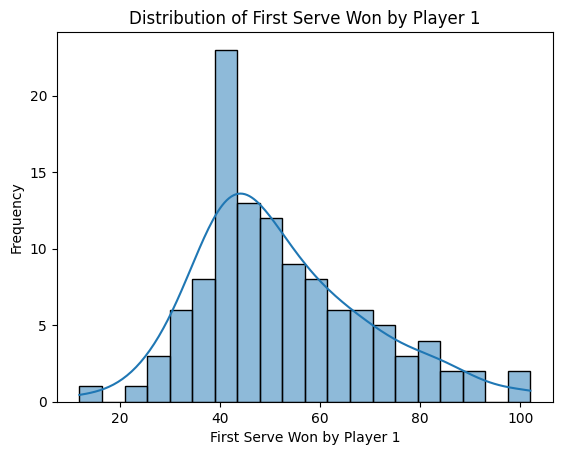

T-statistic:  -0.25419059235026753
P-value:  0.7995794389254013
Accuracy:  0.5652173913043478
Classification Report: 
              precision    recall  f1-score   support

           0       0.75      0.43      0.55        14
           1       0.47      0.78      0.58         9

    accuracy                           0.57        23
   macro avg       0.61      0.60      0.56        23
weighted avg       0.64      0.57      0.56        23

Confusion Matrix: 
[[6 8]
 [2 7]]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv('Wimbledon-men-2013.csv')

print("Dataset shape: ", df.shape)
print("Columns in the dataset: ", df.columns)
print("Data types of columns: ", df.dtypes)
print("Summary statistics of numerical columns: ", df.describe())

# Perform data visualization to gain insights
sns.histplot(df['FSW.1'], bins=20, kde=True)
plt.title("Distribution of First Serve Won by Player 1")
plt.xlabel("First Serve Won by Player 1")
plt.ylabel("Frequency")
plt.show()

# Perform statistical analysis
t_stat, p_value = ttest_ind(df['FSW.1'], df['FSW.2'])
print("T-statistic: ", t_stat)
print("P-value: ", p_value)

# Perform machine learning analysis
X = df[['FSW.1', 'FSW.2']]
y = df['Result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: ")
print(classification_report(y_test, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))

#**QUESTION 8**
**What is the probability mass function (PMF) and cumulative distribution function (CDF) for the "FSP.1" (First Serve Percentage) column in the "Wimbledon-women-2013.csv" dataset using Python libraries such as pandas, matplotlib, numpy, seaborn, scipy, and sklearn?**

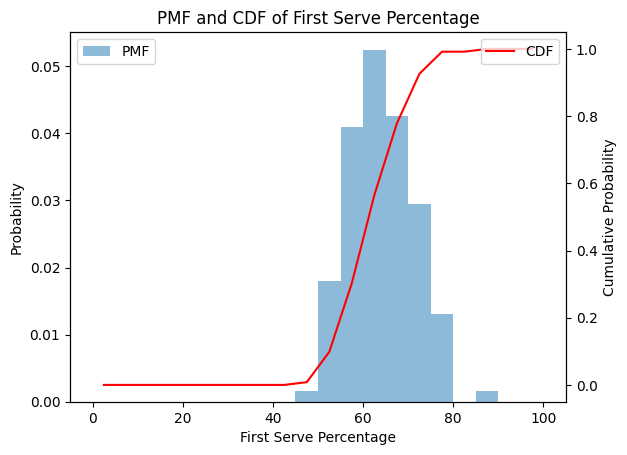

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import cumfreq
from sklearn.preprocessing import normalize

df = pd.read_csv('Wimbledon-women-2013.csv')
fsp1 = df['FSP.1']

pmf, edges = np.histogram(fsp1, bins=np.linspace(0, 100, 21), density=True)
bin_width = edges[1] - edges[0]
bin_centers = edges[:-1] + bin_width / 2

cdf = np.cumsum(pmf) * bin_width

fig, ax1 = plt.subplots()
ax1.bar(bin_centers, pmf, width=bin_width, label='PMF', alpha=0.5)
ax1.set_xlabel('First Serve Percentage')
ax1.set_ylabel('Probability')
ax2 = ax1.twinx()
ax2.plot(bin_centers, cdf, label='CDF', color='r')
ax2.set_ylabel('Cumulative Probability')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('PMF and CDF of First Serve Percentage')
plt.show()